# Aula 5 - Demonstração de um Projeto de Dados

Vamos desenvolver um pequeno projeto com vocês para poder servir de *template para o projeto final*, com documentação de todos os passos e explicação de alguns pontos extras que podem ajudar na estrturação do raciocínio.

## **1. Pequeno Projeto de Demonstração - Manutenção Preditiva**

**Definição do Problema:** Com base em diversos valores de sensores, devemos desenvolver um modelo preditivo para determinar se a nossa máquina vai falhar a daqui 20 ciclos. Uma melhor descrição do problema pode ser encontrada [nesse link](https://github.com/IAugustoMZ/predictive_maintenance_case).

In [49]:
# pacotes
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignorar warnings
warnings.filterwarnings('ignore')

# definição de constantes
DATASOURCE = './data/PM_train.txt'
RANDOM_SEED = 16
np.random.seed(RANDOM_SEED)

# lista de nomes de colunas (extraído do dicionário de dados)
real_col_names = [
    'asset_id',
    'runtime',
    'set1',
    'set2',
    'set3'
]

for i in range(1, 22):
    real_col_names.append(f'tag{i}')

### **1. Carrregar Dados e Análise Preliminar**

In [50]:
# carregando dados
data = pd.read_csv(DATASOURCE, header=None, sep=' ')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [51]:
# exploração inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [52]:
# limpar colunas adicionais (100 % NaN)
data.drop([26, 27], axis=1, inplace=True)

In [53]:
# renomear as colunas com o dicionário de dados
data.columns = real_col_names
data.head()

,asset_id,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,...,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [54]:
# verificação de dados nulos
data.isna().sum()

asset_id    0
runtime     0
set1        0
set2        0
set3        0
tag1        0
tag2        0
tag3        0
tag4        0
tag5        0
tag6        0
tag7        0
tag8        0
tag9        0
tag10       0
tag11       0
tag12       0
tag13       0
tag14       0
tag15       0
tag16       0
tag17       0
tag18       0
tag19       0
tag20       0
tag21       0
dtype: int64

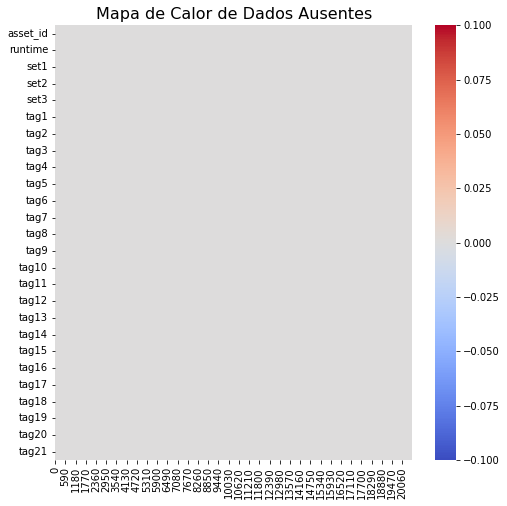

In [55]:
# mapa de calor de dados nulos
plt.figure(figsize=(8, 8))
sns.heatmap(data.isna().T, vmin=0, cmap='coolwarm')
plt.title('Mapa de Calor de Dados Ausentes', size=16)
plt.show()

### **2. Análise Exploratória de Dados**

In [56]:
# analisar qual é o máximo de ciclos para cada máquina
cycles_per_asset = pd.DataFrame(
    data.groupby(['asset_id'])['runtime'].max().values,
    columns=['ciclo_maximo'],
    index=data.groupby(['asset_id'])['runtime'].max().index
)

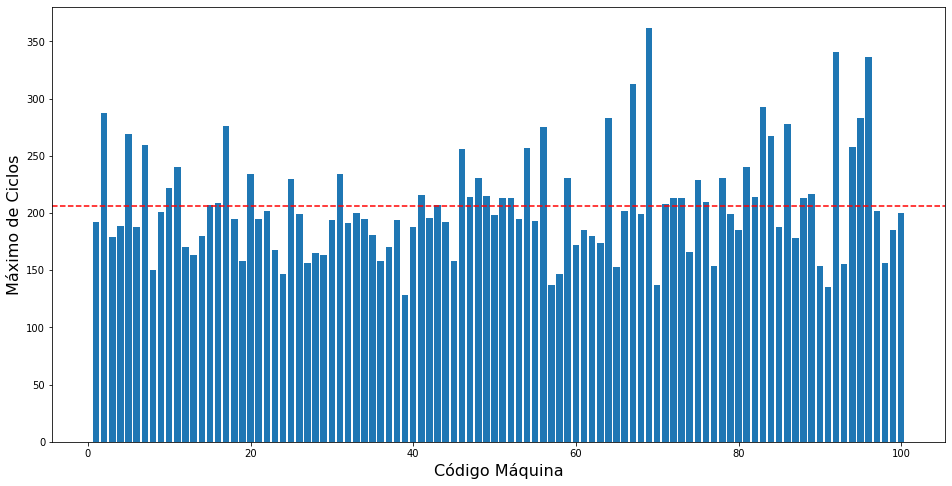

In [57]:
# visualizando ciclos máximos
plt.figure(figsize=(16, 8))
plt.bar(x=cycles_per_asset.index, height=cycles_per_asset.ciclo_maximo)
plt.axhline(y=np.mean(cycles_per_asset.ciclo_maximo.values), ls='--', color='red')
plt.xlabel('Código Máquina', size=16)
plt.ylabel('Máximo de Ciclos', size=16)
plt.show()

#### **2.1. Feature Engineering para criar classe de falha**

In [58]:
# função para realizar o feature engineeering da classe de falha
def create_failure_class(row,
                         grouped_data: pd.DataFrame) -> int:
    """
    cria a classe de falha
    1 - a máquina vai falhar em ciclo atual + 20 ciclos
    0 - a máquina não vai falhar em ciclo atual + 20 ciclos

    parâmtros:
        row: linha do dataframe
        grouped_data: dados agrupados por id
    retorna:
        classe de falha
    """

    # informação de negócio
    MAXIMO_CICLOS = 20

    # extrair o valor do ciclo histórico máximo pelo id
    max_cycle = grouped_data.loc[
        row['asset_id'],
        'ciclo_maximo'
    ]

    # aplica a regra de negócios de falha
    if row['runtime'] + MAXIMO_CICLOS > max_cycle:
        return 1
    else:
        return 0

In [62]:
# criação de classes de falhas
data['failure'] = data[['asset_id', 'runtime']].apply(
    create_failure_class,
    grouped_data=cycles_per_asset,
    axis=1
)
data.head()

,asset_id,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0


In [63]:
# eliminando a coluna de id (queremos generalizar a predição para qualquer máquina,
# olhando apenas os valores dos sensores)
data.drop(['asset_id'], axis=1, inplace=True)

In [64]:
# checando estatísticas descritivas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
set1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
set2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
set3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
tag1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
tag2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
tag3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
tag4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
tag5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
tag6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100


In [65]:
data.shape

(20631, 26)

Aparentemente, algumas variáveis possuem variância zero. Vamos verificar isso nos histogramas.

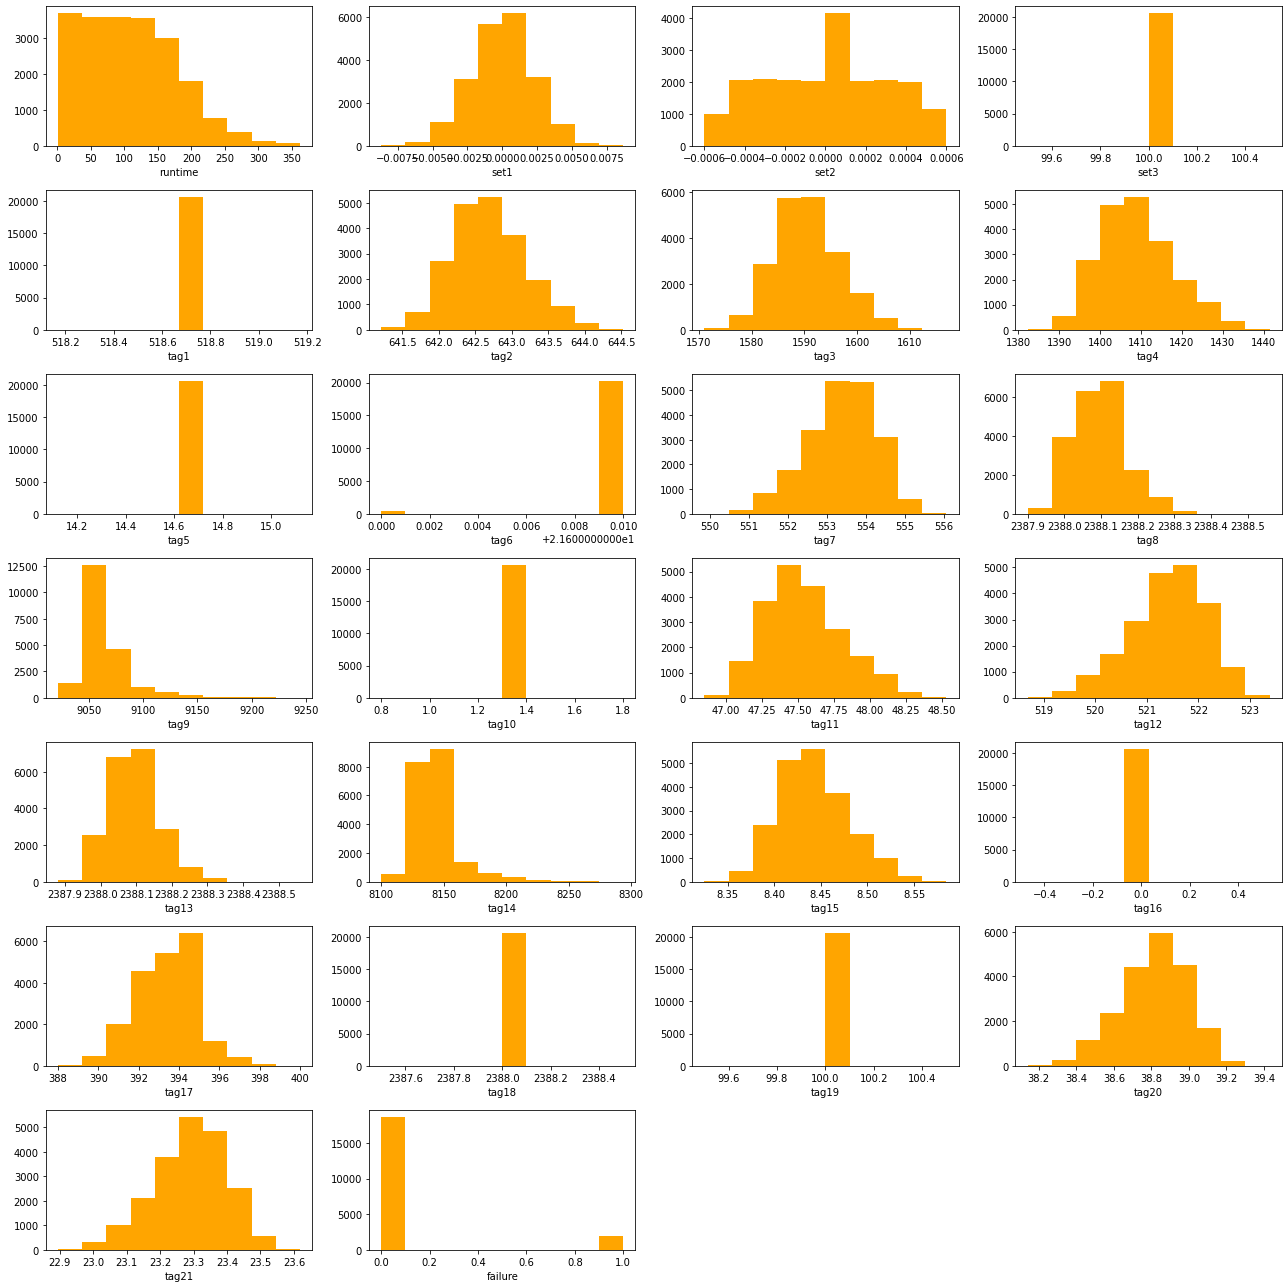

In [66]:
# construindo histogramas
fig = plt.figure(figsize=(18, 18))

for i in range(1, 27):

    ax = fig.add_subplot(7, 4, i)
    ax.hist(data.iloc[:, i-1], color='orange')
    ax.set_xlabel(data.columns[i-1])

plt.tight_layout()
plt.show()

No caso desse conjunto de dados, a maior parte dos sensores apresenta uma distribuição bem simétrica. Algumas features de fato possuem variância nula ou muito pequena. São elas: `set3`, `tag1`, `tag5`, `tag6`, `tag10`, `tag16`, `tag18` and `tag19`.

Para os atributos que não são tão simétricos, vamos usar o `QuantileTransform` na modelagem. Para o escalonamento, podemos usar o `RobustScaler`.

No momento de construir o pipeline de modelagem, vamos usar o objeto `VarianceThreshold` para selecionar os atributos com variância não nula, apenas.